## Title: Heart Failure Clinical Records Dataset


In [10]:
# importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("Dataset/heart_failure_clinical_records_dataset.csv")

In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

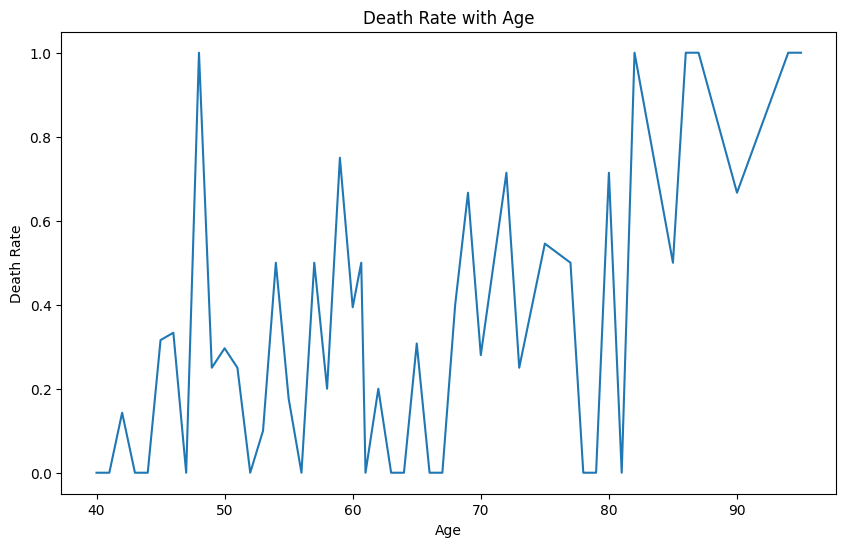

In [16]:
# Death rate with Age
death_rate_age = df.groupby('age')['DEATH_EVENT'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='DEATH_EVENT', data=death_rate_age)
plt.title('Death Rate with Age')
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.show()

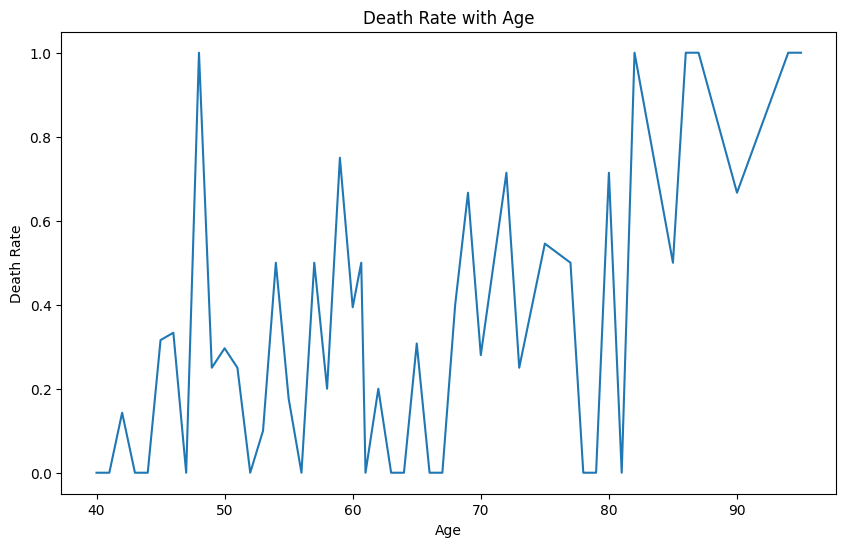

In [17]:

# Death rate with Age
death_rate_age = df.groupby('age')['DEATH_EVENT'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='DEATH_EVENT', data=death_rate_age)
plt.title('Death Rate with Age')
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.show()

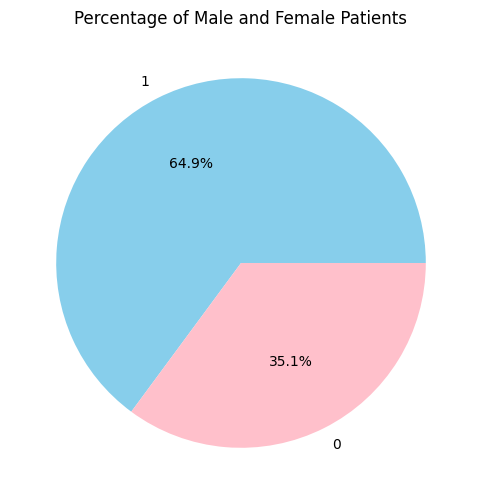

In [19]:
# Percentage of Male and Female Patients
gender_percentage = df['sex'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
gender_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Percentage of Male and Female Patients')
plt.ylabel('')
plt.show()

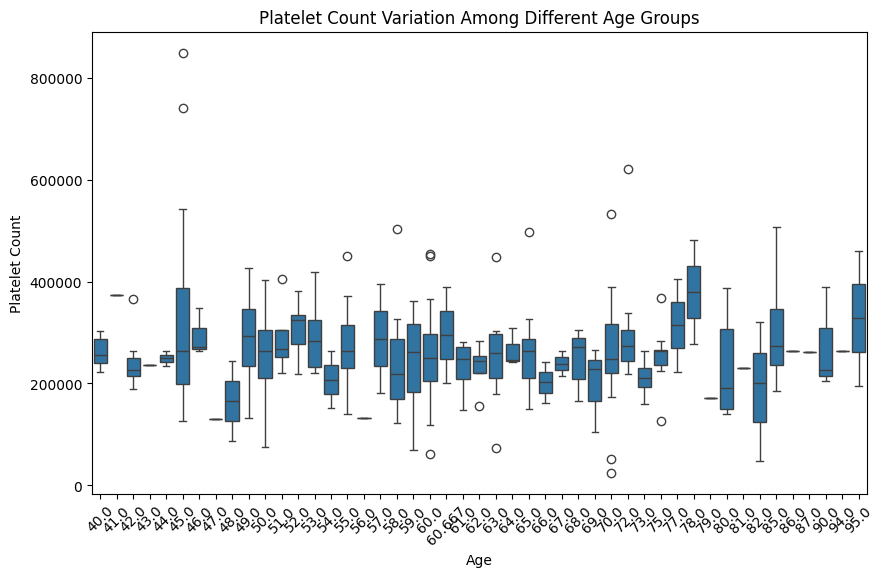

In [21]:
# 1. Platelet count variation among different age groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='platelets', data=df)
plt.title('Platelet Count Variation Among Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Platelet Count')
plt.xticks(rotation=45)
plt.show()

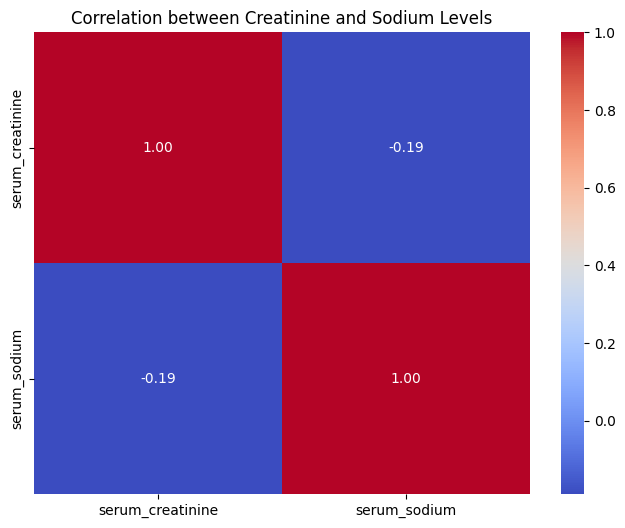

In [26]:
# 2. Correlation between creatinine and sodium levels in the blood
plt.figure(figsize=(8, 6))
sns.heatmap(df[['serum_creatinine', 'serum_sodium']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Creatinine and Sodium Levels')
plt.show()

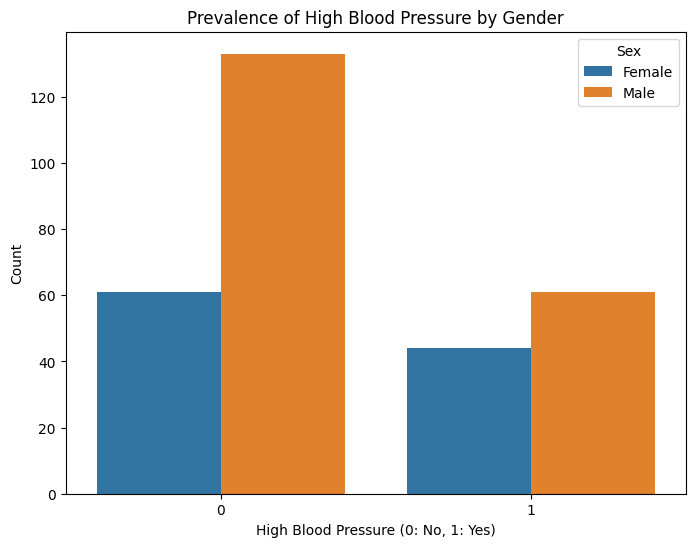

In [30]:
# 3. Prevalence of high blood pressure between male and female patients
plt.figure(figsize=(8, 6))
sns.countplot(x='high_blood_pressure', hue='sex', data=df)
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('High Blood Pressure (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

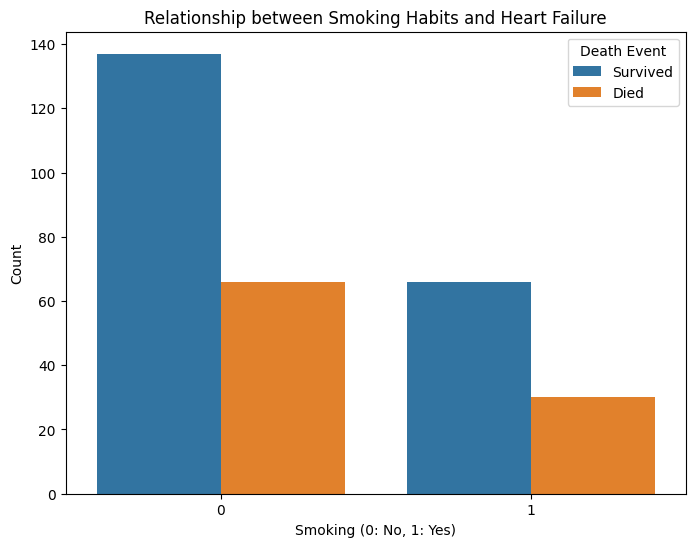

In [31]:
# 4. Relationship between smoking habits and occurrence of heart failure
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)
plt.title('Relationship between Smoking Habits and Heart Failure')
plt.xlabel('Smoking (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Death Event', labels=['Survived', 'Died'])
plt.show()

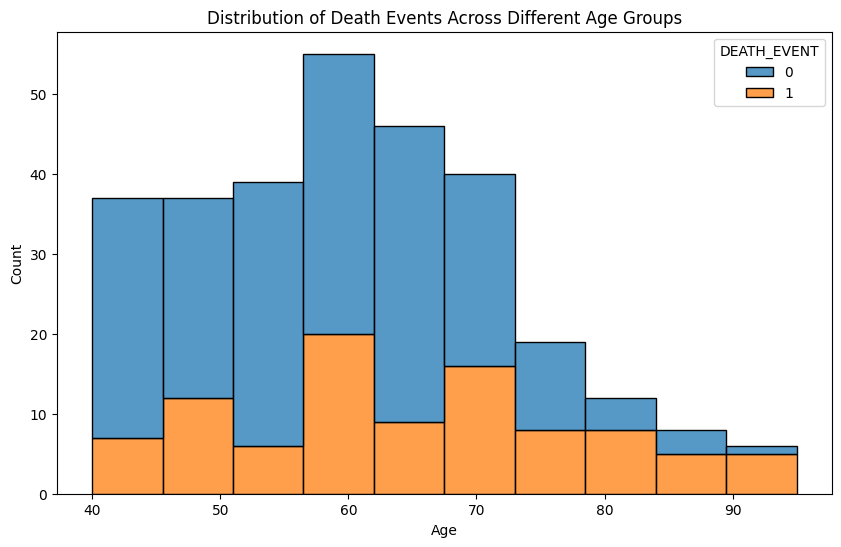

In [32]:
# 5. Distribution of death events across different age groups
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='DEATH_EVENT', data=df, multiple='stack')
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

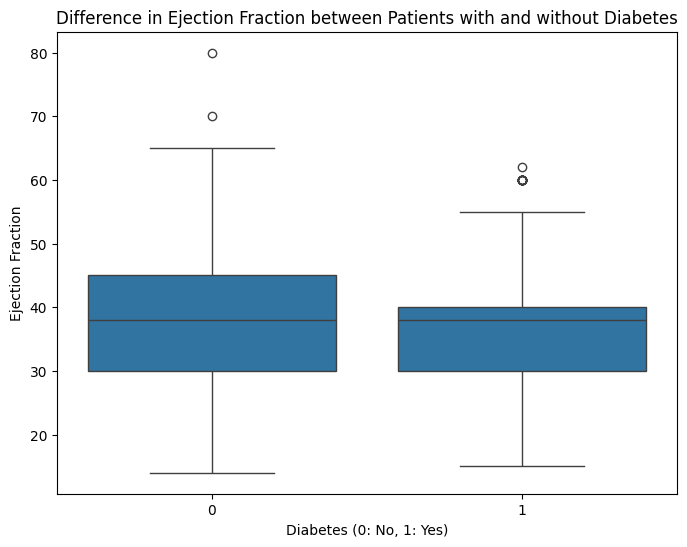

In [33]:
# 6. Difference in ejection fraction between patients with and without diabetes
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=df)
plt.title('Difference in Ejection Fraction between Patients with and without Diabetes')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Ejection Fraction')
plt.show()

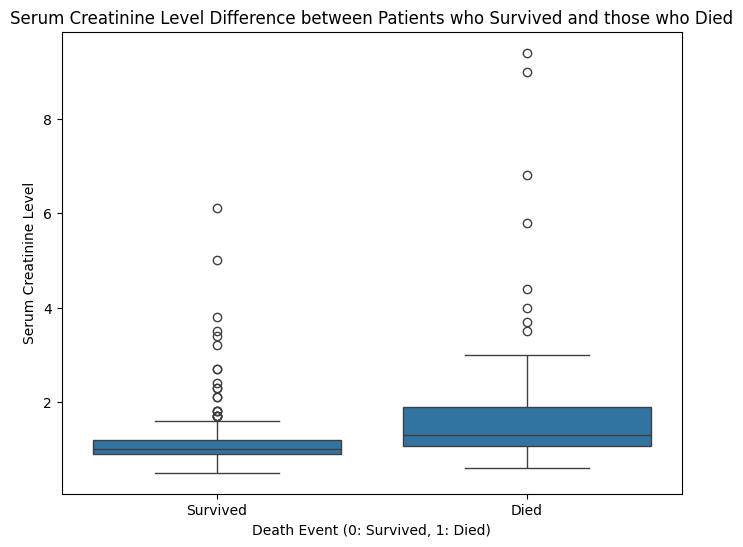

In [34]:
# 7. Serum creatinine level difference between patients who survived and those who did not
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Level Difference between Patients who Survived and those who Died')
plt.xlabel('Death Event (0: Survived, 1: Died)')
plt.ylabel('Serum Creatinine Level')
plt.xticks([0, 1], ['Survived', 'Died'])
plt.show()